<a href="https://colab.research.google.com/github/tranchile/DO_AN_1_K16_A2/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Các Kỹ Thuật Chuỗi Thời Gian Bạn Cần Biết

Phân tích chuỗi thời gian là một khía cạnh quan trọng của khoa học dữ liệu, đặc biệt khi làm việc với các tập dữ liệu được thu thập hoặc ghi lại theo thời gian. Hiểu về dữ liệu chuỗi thời gian giúp các nhà khoa học dữ liệu xác định các xu hướng, mô hình theo mùa và các điểm bất thường tiềm năng để đưa ra dự đoán. Vì vậy, nếu bạn muốn nâng cao kỹ năng làm việc với các vấn đề về chuỗi thời gian, bài viết này dành cho bạn. Trong bài viết này, tôi sẽ giới thiệu với bạn một số kỹ thuật chuỗi thời gian thiết yếu mà bạn nên biết với tư cách là một Nhà khoa học dữ liệu.


Trước khi đi vào các kỹ thuật cụ thể, bạn tham khảo các liên kết dưới đây để hiểu về chuỗi thời gian:

1. https://viblo.asia/p/chuoi-thoi-gian-la-gi-what-is-time-series-pgjLNd6w432

2. https://viblo.asia/p/tong-quan-ve-du-bao-chuoi-thoi-gian-y37LdwGYJov

3. https://machinelearningcoban.com/tabml_book/ch_data_processing/timeseries_data.html

4. https://online.stat.psu.edu/stat510/lesson/5/5.1

5. https://www.youtube.com/watch?v=J9jZ6PuqgY8
6. https://www.youtube.com/watch?v=IbFqMxVuFLM
7. https://maths.uel.edu.vn/Resources/Docs/SubDomain/maths/TaiLieuHocTap/ToanUngDung/khi_nim_v_t_tng_quan.html
8. https://www.youtube.com/watch?v=TwyNFGTUoY4&list=PLMm4sOMuA2QI5x_0KlNT3LuKDi6-ByboB&index=28
9. https://www.youtube.com/watch?v=45c4pUPH6nk&list=PLMm4sOMuA2QI5x_0KlNT3LuKDi6-ByboB&index=29
10. https://www.youtube.com/watch?v=zCxMLNzPa1M&list=PLMm4sOMuA2QI5x_0KlNT3LuKDi6-ByboB&index=30
11. https://www.youtube.com/watch?v=FiaGopKceqA



## Các Kỹ Thuật Chuỗi Thời Gian Bạn Cần Biết
Dưới đây là một số kỹ thuật chuỗi thời gian thiết yếu mà bạn nên biết với tư cách là một Nhà khoa học dữ liệu:

1. Hiểu và chuẩn bị dữ liệu chuỗi thời gian
2. Phân rã chuỗi thời gian
3. Trung bình trượt và làm mượt
4. Tính dừng và sai phân
5. Tự tương quan và tự tương quan từng phần
6. Trích xuất dữ liệu ngày từ dữ liệu
7. Mô hình ARIMA và SARIMA

Chúng ta hãy cùng đi qua chi tiết từng kỹ thuật với việc triển khai bằng Python. Để triển khai tất cả các kỹ thuật này, tôi sẽ sử dụng dữ liệu chuỗi thời gian dựa trên sự tăng trưởng thuê bao của Netflix. Bạn có thể tải xuống tập dữ liệu từ đây.

https://statso.io/forecasting-subscriptions-case-study/

## 1. Hiểu và Chuẩn Bị Dữ Liệu Chuỗi Thời Gian
Dữ liệu chuỗi thời gian bao gồm các dãy điểm dữ liệu được thu thập tại các khoảng thời gian đều đặn. Ví dụ bao gồm giá cổ phiếu hàng ngày, dữ liệu bán hàng hàng tháng và ghi nhận lượng mưa hàng năm. Hiểu và chuẩn bị dữ liệu chuỗi thời gian bao gồm việc xác định các biến liên quan đến thời gian và chuyển đổi chúng thành định dạng phù hợp cho phân tích.

Dưới đây là cách chuyển đổi dữ liệu chuỗi thời gian thành định dạng phù hợp cho phân tích:
1. Import Libraries: Bắt đầu bằng việc import các thư viện cần thiết như Pandas và Numpy.
2. Load Data: Tải dữ liệu chuỗi thời gian vào DataFrame của Pandas.
3. Convert Date Column: Chuyển đổi cột ngày thành định dạng datetime để dễ dàng thao tác.
4. Set Date as Index: Đặt cột ngày làm chỉ mục của DataFrame để thuận tiện cho việc truy vấn và tính toán.
5. Check for Missing Values: Kiểm tra và xử lý các giá trị bị thiếu trong dữ liệu.


In [ ]:
import pandas as pd

netflix_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/Time Series Techniques/Netflix-Subscriptions.csv')

# convert 'Time Period' to datetime
netflix_data['Time Period'] = pd.to_datetime(netflix_data['Time Period'])

# set 'Time Period' as the index
netflix_data.set_index('Time Period', inplace=True)

# display the first few rows to confirm changes
print(netflix_data.head())

             Subscribers
Time Period             
2013-01-04      34240000
2013-01-07      35640000
2013-01-10      38010000
2014-01-01      41430000
2014-01-04      46130000


MỞ RỘNG

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/Time Series Techniques/Instagram-Reach.csv')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index
data.set_index('Date', inplace=True)

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Fill missing values (if any) - here using forward fill method as an example
data.fillna(method='ffill', inplace=True)


Instagram reach    0
dtype: int64


##2. Phân Rã Chuỗi Thời Gian
Phân rã chuỗi thời gian thành các thành phần của nó (xu hướng, tính mùa vụ, và phần dư) giúp hiểu các mô hình cơ bản, từ đó giúp chọn lựa thuật toán phù hợp để dự đoán chuỗi thời gian.

Dưới đây là cách phân rã một chuỗi thời gian:

1. Import Libraries: Import các thư viện cần thiết như statsmodels và matplotlib để xử lý và hiển thị dữ liệu.
2. Load Data: Tải dữ liệu chuỗi thời gian vào DataFrame của Pandas.
3. Decompose Time Series: Sử dụng phương pháp phân rã để tách chuỗi thời gian thành các thành phần của nó.
4. Visualize Components: Hiển thị các thành phần đã được phân rã để dễ dàng quan sát.

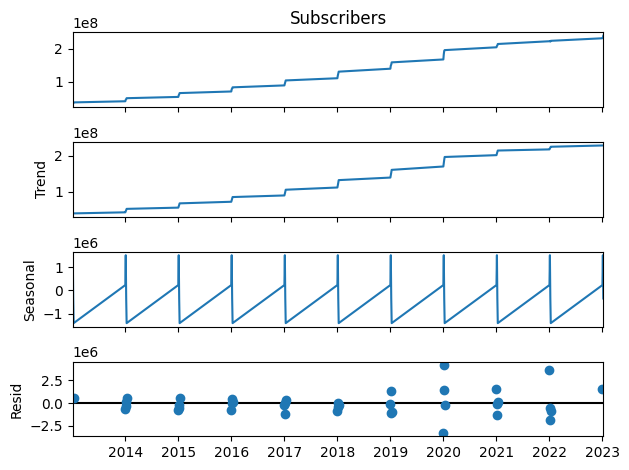

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# decomposing the time series
decomposition = sm.tsa.seasonal_decompose(netflix_data['Subscribers'], model='additive', period=4)
decomposition.plot()
plt.show()

MỞ RỘNG

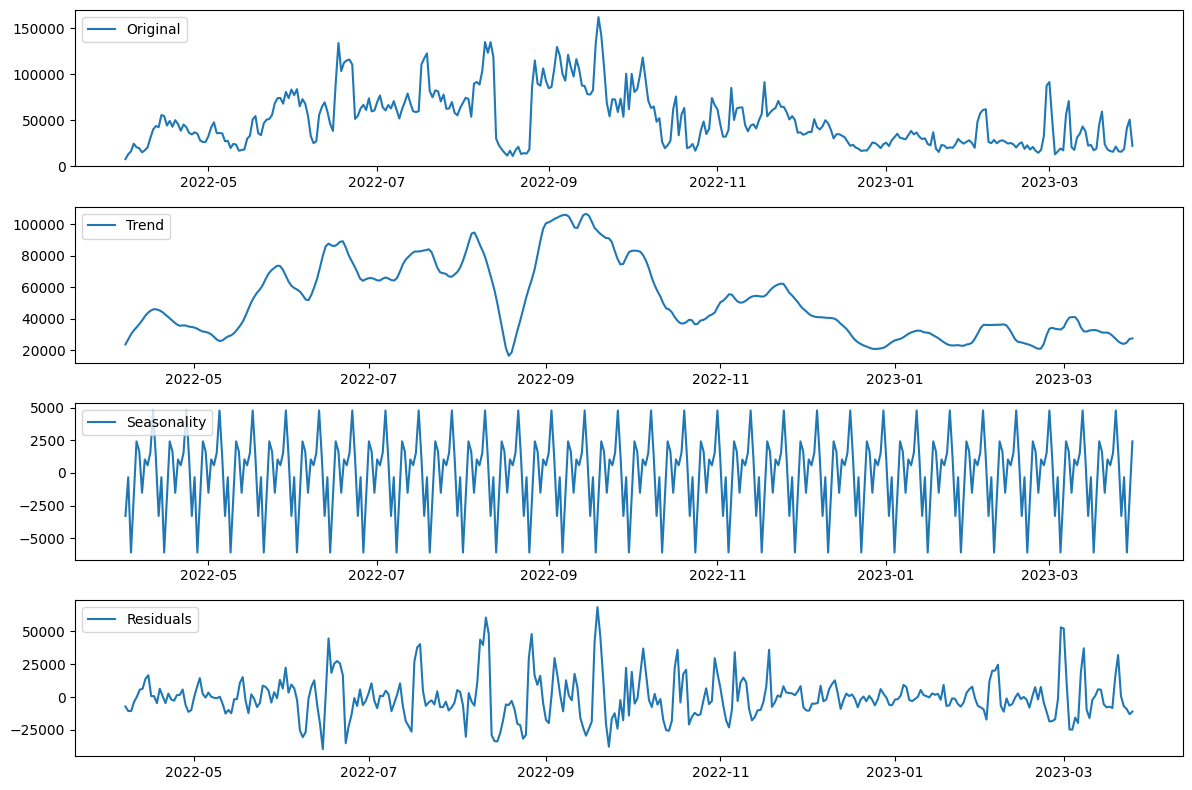

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/Time Series Techniques/Instagram-Reach.csv')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index
data.set_index('Date', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(data['Instagram reach'], model='additive', period=12)  # 'Value' là cột chứa dữ liệu cần phân rã

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Instagram reach'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



## 3. Trung Bình Trượt và Làm Mượt
Trung bình trượt giúp làm mượt các biến động ngắn hạn và làm nổi bật các xu hướng dài hạn. Bằng cách tính trung bình của các điểm dữ liệu trong một số khoảng thời gian nhất định, trung bình trượt giảm thiểu nhiễu và biến động trong dữ liệu gốc, giúp dễ dàng xác định các mô hình và xu hướng cơ bản.

Dưới đây là cách tính trung bình trượt:

1. Import Libraries: Import các thư viện cần thiết như Pandas và Matplotlib.
2. Load Data: Tải dữ liệu chuỗi thời gian vào DataFrame của Pandas.
3. Calculate Moving Averages: Tính trung bình trượt cho một số khoảng thời gian cụ thể.
4. Visualize Moving Averages: Hiển thị kết quả trung bình trượt để dễ dàng quan sát.

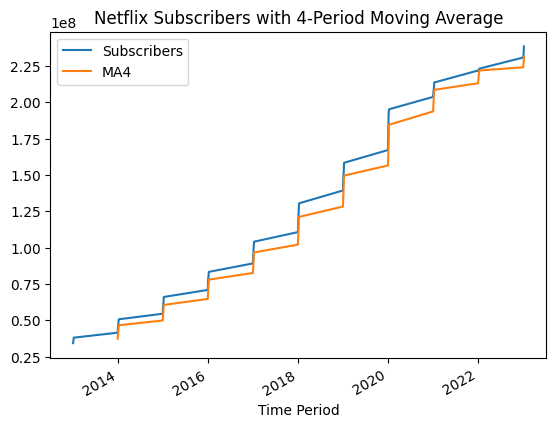

In [ ]:
# calculating moving averages
netflix_data['MA4'] = netflix_data['Subscribers'].rolling(window=4).mean()

# plotting original data and moving average
netflix_data[['Subscribers', 'MA4']].plot()
plt.title('Netflix Subscribers with 4-Period Moving Average')
plt.show()

MỞ RỘNG

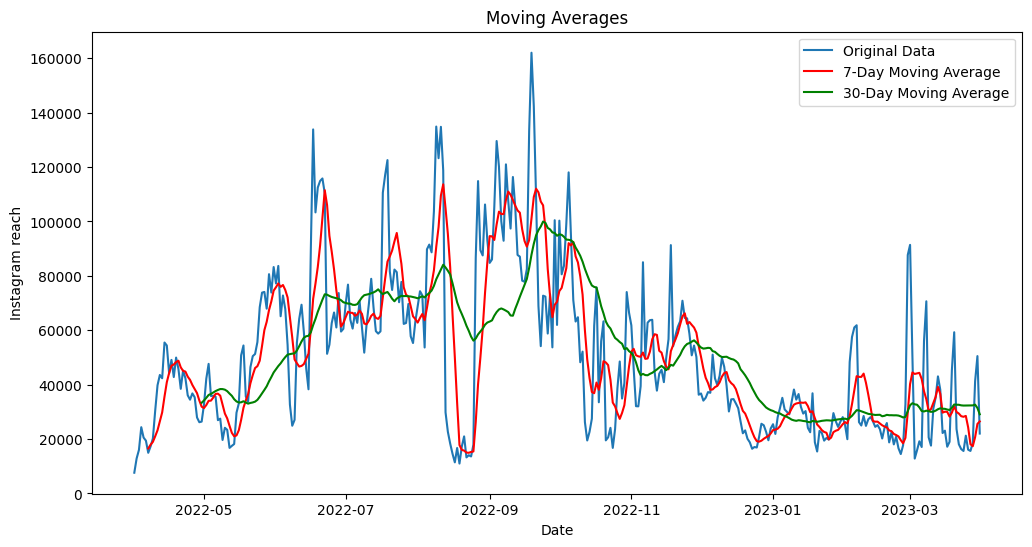

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/Time Series Techniques/Instagram-Reach.csv')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index
data.set_index('Date', inplace=True)

# Calculate moving averages
data['Moving_Avg_7'] = data['Instagram reach'].rolling(window=7).mean()  # 7-day moving average
data['Moving_Avg_30'] = data['Instagram reach'].rolling(window=30).mean()  # 30-day moving average

# Plot the original data and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Instagram reach'], label='Original Data')
plt.plot(data['Moving_Avg_7'], label='7-Day Moving Average', color='red')
plt.plot(data['Moving_Avg_30'], label='30-Day Moving Average', color='green')
plt.legend(loc='best')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Instagram reach')
plt.show()


## 4. Tính Dừng và Sai Phân
Một chuỗi thời gian dừng có các đặc tính không phụ thuộc vào thời gian mà chuỗi được quan sát. Kiểm tra tính dừng là rất quan trọng cho nhiều mô hình dự báo chuỗi thời gian.

Dưới đây là cách kiểm tra tính dừng và thực hiện sai phân để đạt được tính dừng:

1. Import Libraries: Import các thư viện cần thiết như Pandas và adfuller từ statsmodels để kiểm tra tính dừng.
2. Load Data: Tải dữ liệu chuỗi thời gian vào DataFrame của Pandas.
3. Check Stationarity: Sử dụng kiểm định Dickey-Fuller để kiểm tra tính dừng của chuỗi thời gian.
4. Perform Differencing (Sai Phân): Thực hiện sai phân để làm cho chuỗi thời gian dừng.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# perform augmented dickey-fuller test
result = adfuller(netflix_data['Subscribers'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# differencing to achieve stationarity
netflix_data['Subscribers_diff'] = netflix_data['Subscribers'].diff().dropna()

# re-perform ADF test on differenced data
result_diff = adfuller(netflix_data['Subscribers_diff'].dropna())
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

ADF Statistic: 0.20591078338329172
p-value: 0.972591170013349
ADF Statistic (Differenced): -4.523088428253382
p-value (Differenced): 0.00017858926729786176


MỞ RỘNG

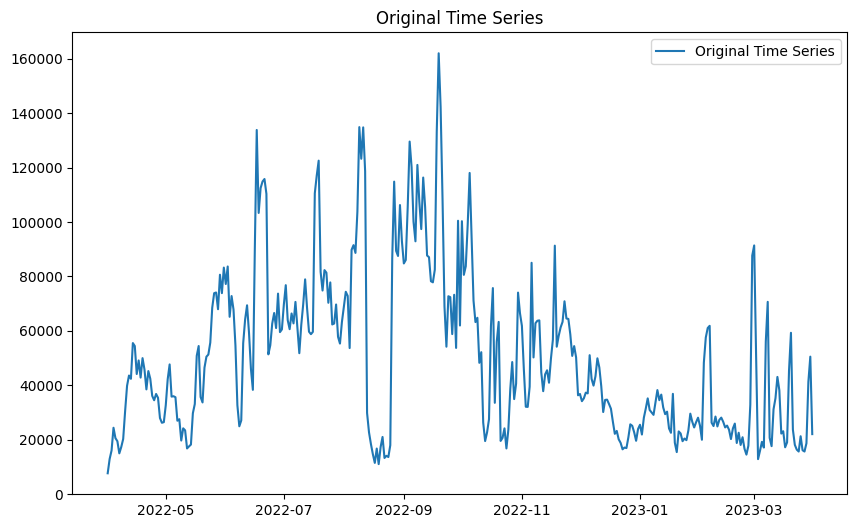

ADF Statistic: -4.8009873748253105
p-value: 5.414989602967801e-05
Critical Values:
1%: -3.448544133483233
5%: -2.8695574079525565
10%: -2.5710411593052713


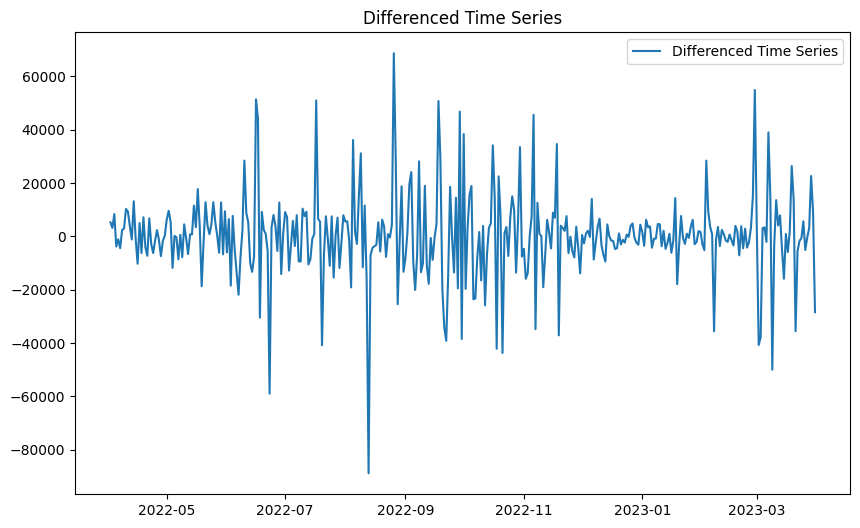

ADF Statistic after Differencing: -8.209050613108504
p-value after Differencing: 6.897567221050353e-13
Critical Values after Differencing:
1%: -3.4491725955218655
5%: -2.8698334971428574
10%: -2.5711883591836733


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/Time Series Techniques/Instagram-Reach.csv')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index
data.set_index('Date', inplace=True)

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(data['Instagram reach'], label='Original Time Series')
plt.legend(loc='best')
plt.title('Original Time Series')
plt.show()

# Check for stationarity
result = adfuller(data['Instagram reach'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

# Perform differencing (sai phân)
data['Differenced'] = data['Instagram reach'].diff().dropna()

# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(data['Differenced'], label='Differenced Time Series')
plt.legend(loc='best')
plt.title('Differenced Time Series')
plt.show()

# Check stationarity of differenced series
result_diff = adfuller(data['Differenced'].dropna())
print('ADF Statistic after Differencing:', result_diff[0])
print('p-value after Differencing:', result_diff[1])
print('Critical Values after Differencing:')
for key, value in result_diff[4].items():
    print(f'{key}: {value}')


## 5. Tự Tương Quan và Tự Tương Quan Từng Phần
Tự tương quan (ACF) và tự tương quan từng phần (PACF) là các công cụ để xác định mối tương quan của chuỗi thời gian với các giá trị quá khứ của chính nó. ACF đo lường mối tương quan giữa chuỗi thời gian và các giá trị trễ của nó, cung cấp cái nhìn sâu sắc về các mô hình lặp lại, chẳng hạn như tính mùa vụ hoặc hành vi chu kỳ, trên toàn bộ chuỗi. Ngược lại, PACF cô lập ảnh hưởng trực tiếp của một trễ lên chuỗi bằng cách loại bỏ ảnh hưởng của các trễ trung gian, giúp xác định thứ tự thực sự của các tham số autoregressive trong mô hình chuỗi thời gian.

Dưới đây là cách vẽ đồ thị ACF và PACF bằng Python:

1. Import Libraries: Import các thư viện cần thiết như Pandas, Matplotlib, và các hàm ACF và PACF từ statsmodels.
2. Load Data: Tải dữ liệu chuỗi thời gian vào DataFrame của Pandas.
3. Plot ACF and PACF: Sử dụng các hàm plot_acf và plot_pacf để vẽ đồ thị ACF và PACF.

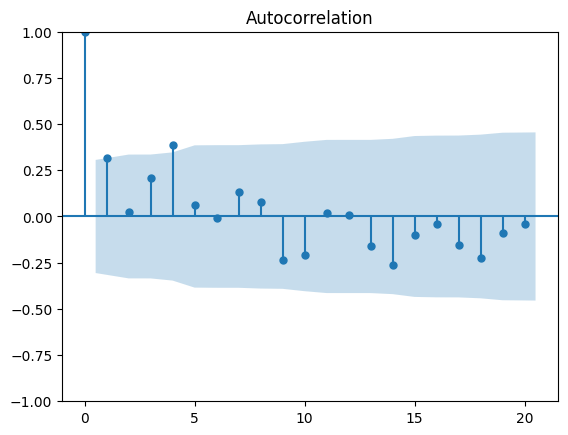

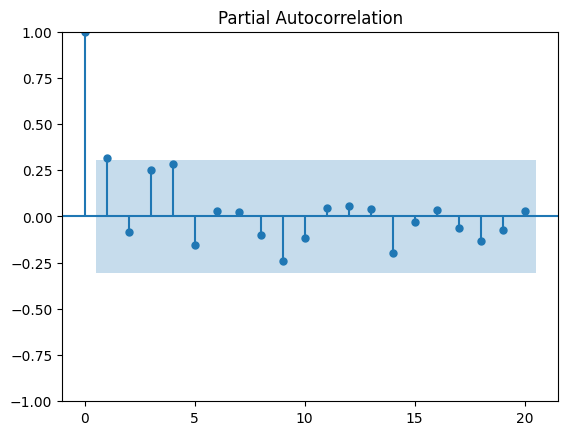

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plotting ACF and PACF
plot_acf(netflix_data['Subscribers_diff'].dropna(), lags=20)
plt.show()

plot_pacf(netflix_data['Subscribers_diff'].dropna(), lags=20)
plt.show()

MỞ RỘNG

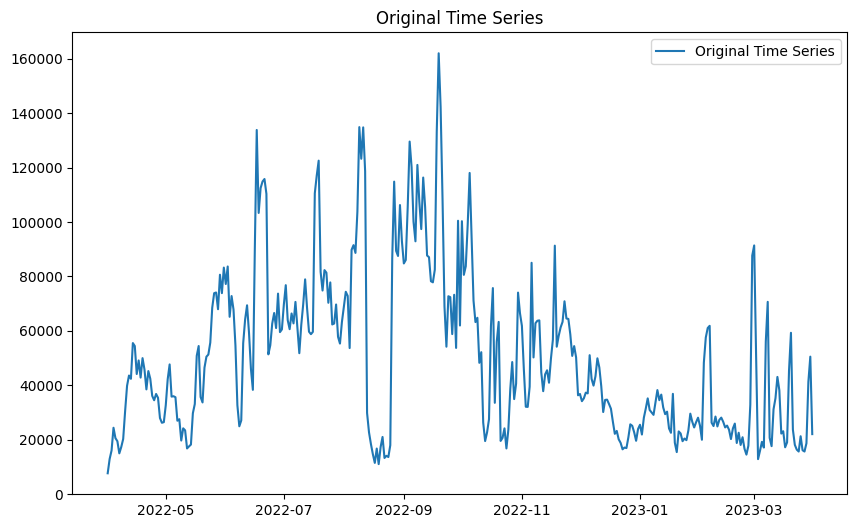

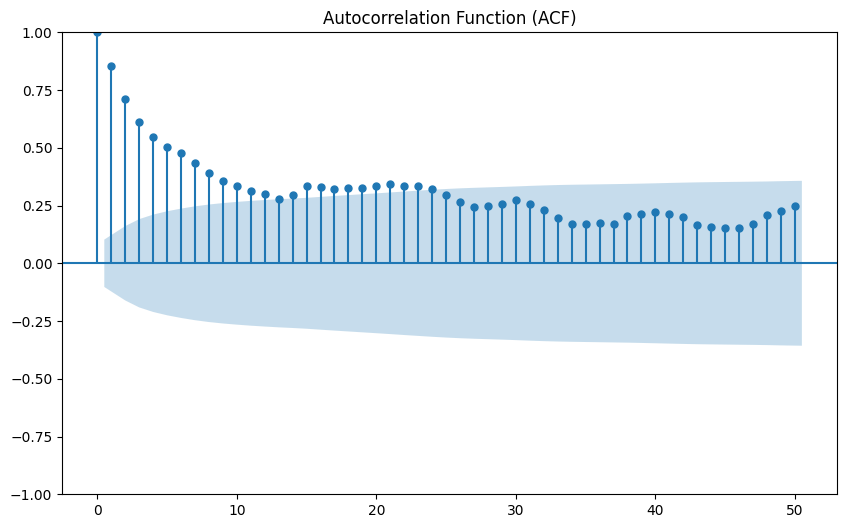

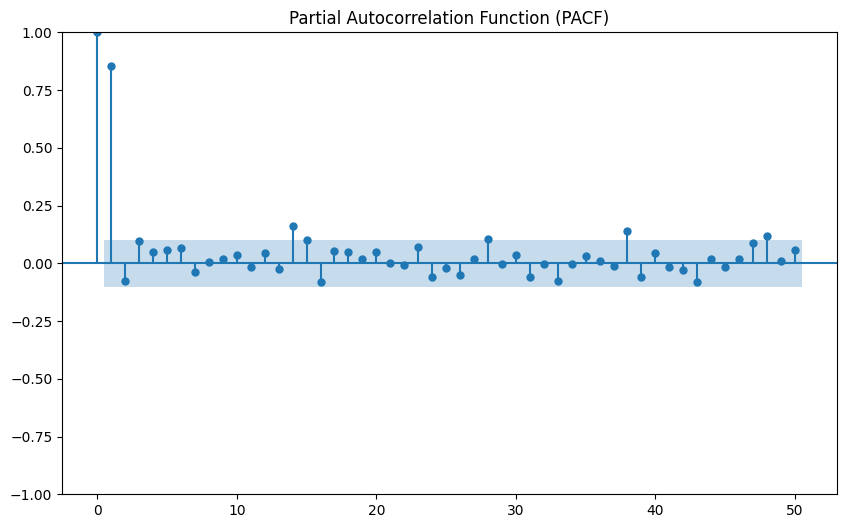

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/Time Series Techniques/Instagram-Reach.csv')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index
data.set_index('Date', inplace=True)

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(data['Instagram reach'], label='Original Time Series')
plt.legend(loc='best')
plt.title('Original Time Series')
plt.show()

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(data['Instagram reach'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(data['Instagram reach'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


## 6. Trích Xuất Dữ Liệu Ngày từ dữ liệu
Trích xuất dữ liệu ngày từ dữ liệu giúp phân tích chi tiết các mô hình cơ bản trong chuỗi thời gian. Dưới đây là cách trích xuất thông tin ngày từ các ngày tháng:

1. Import Libraries: Import các thư viện cần thiết như Pandas.
2. Load Data: Tải dữ liệu chuỗi thời gian vào DataFrame của Pandas.
3. Extract Day Information: Trích xuất thông tin ngày từ cột ngày tháng.

In [ ]:
# extract day of the month
netflix_data['DayOfMonth'] = netflix_data.index.day

# extract day of the week (Monday=0, Sunday=6)
netflix_data['DayOfWeek'] = netflix_data.index.dayofweek

# extract day name (e.g., Monday, Tuesday)
netflix_data['DayName'] = netflix_data.index.day_name()

# display the dataset with extracted day information
print(netflix_data.head())

             Subscribers         MA4  Subscribers_diff  DayOfMonth  DayOfWeek  \
Time Period                                                                     
2013-01-04      34240000         NaN               NaN           4          4   
2013-01-07      35640000         NaN         1400000.0           7          0   
2013-01-10      38010000         NaN         2370000.0          10          3   
2014-01-01      41430000  37330000.0         3420000.0           1          2   
2014-01-04      46130000  40302500.0         4700000.0           4          5   

               DayName  
Time Period             
2013-01-04      Friday  
2013-01-07      Monday  
2013-01-10    Thursday  
2014-01-01   Wednesday  
2014-01-04    Saturday  


MỞ RỘNG

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/Time Series Techniques/Instagram-Reach.csv')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract day information
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday
data['DayOfYear'] = data['Date'].dt.dayofyear

# Display the first few rows of the dataframe to see the extracted columns
print(data.head())


        Date  Instagram reach  Day  Weekday  DayOfYear
0 2022-04-01             7620    1        4         91
1 2022-04-02            12859    2        5         92
2 2022-04-03            16008    3        6         93
3 2022-04-04            24349    4        0         94
4 2022-04-05            20532    5        1         95


## 7. ARIMA và SARIMA
ARIMA (AutoRegressive Integrated Moving Average) và SARIMA (Seasonal ARIMA) là những mô hình dự báo chuỗi thời gian mạnh mẽ. ARIMA kết hợp ba thành phần: autoregression (AR), sai phân (I), và trung bình trượt (MA) để mô hình hóa các phụ thuộc theo thời gian và xu hướng trong dữ liệu chuỗi thời gian không dừng. Nó hiệu quả trong việc nắm bắt các mối quan hệ tuyến tính và các mô hình theo thời gian. SARIMA mở rộng ARIMA bằng cách kết hợp các thành phần mùa vụ, giúp nó phù hợp với dữ liệu chuỗi thời gian có các mẫu lặp lại theo mùa.

Bạn có thể tìm hiểu chi tiết về ARIMA và SARIMA và cách triển khai bằng Python dưới đây:

https://colab.research.google.com/drive/10aPUhvb3lJ-3jnSstrO2ZvCLXyVp2jad?usp=sharing



## ARIMA
1. Import Libraries: Import các thư viện cần thiết như Pandas, Matplotlib, và ARIMA từ statsmodels.
2. Load Data: Tải dữ liệu chuỗi thời gian vào DataFrame của Pandas.
3. Fit ARIMA Model: Xây dựng mô hình ARIMA và huấn luyện nó với dữ liệu.
4. Forecast: Dự báo các giá trị tương lai và hiển thị kết quả.
Dưới đây là ví dụ về ARIMA bằng Python:

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        Instagram reach   No. Observations:                  365
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4027.732
Date:                Sat, 01 Jun 2024   AIC                           8067.464
Time:                        09:32:19   BIC                           8090.847
Sample:                    04-01-2022   HQIC                          8076.758
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0312      0.041     -0.752      0.452      -0.112       0.050
ar.L2         -0.2058      0.044     -4.695      0.000      -0.292      -0.120
ar.L3         -0.1301      0.048     -2.712      0.0

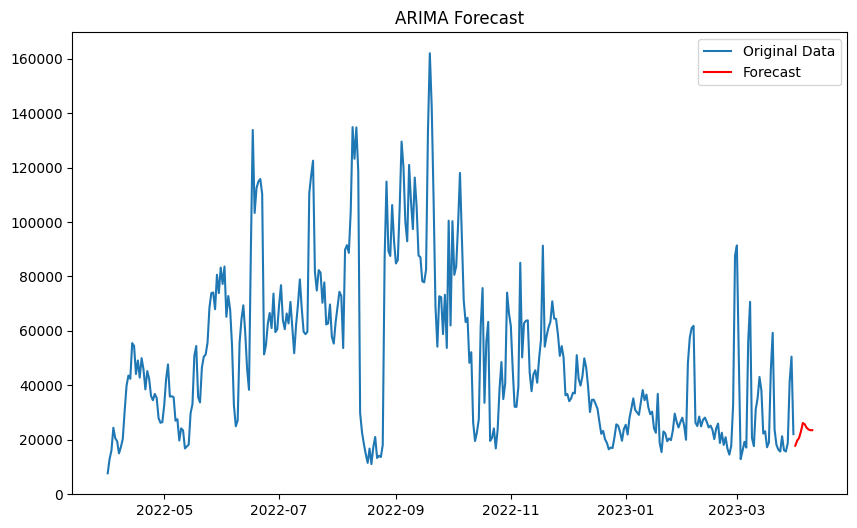

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/Time Series Techniques/Instagram-Reach.csv')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index
data.set_index('Date', inplace=True)

# Fit ARIMA model
model = ARIMA(data['Instagram reach'], order=(5, 1, 0))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=10)
print(forecast)

# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Instagram reach'], label='Original Data')
plt.plot(forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.title('ARIMA Forecast')
plt.show()


## SARIMA
1. Import Libraries: Import các thư viện cần thiết như Pandas, Matplotlib, và SARIMAX từ statsmodels.
2. Load Data: Tải dữ liệu chuỗi thời gian vào DataFrame của Pandas.
3. Fit SARIMA Model: Xây dựng mô hình SARIMA và huấn luyện nó với dữ liệu.
4. Forecast: Dự báo các giá trị tương lai và hiển thị kết quả.
Dưới đây là ví dụ về SARIMA bằng Python:

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3944.546
Date:                            Sat, 01 Jun 2024   AIC                           7899.092
Time:                                    09:32:39   BIC                           7918.410
Sample:                                04-01-2022   HQIC                          7906.779
                                     - 03-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7847      0.086      9.116      0.000       0.616       0.953
ma.L1         -0.9596      0.045   

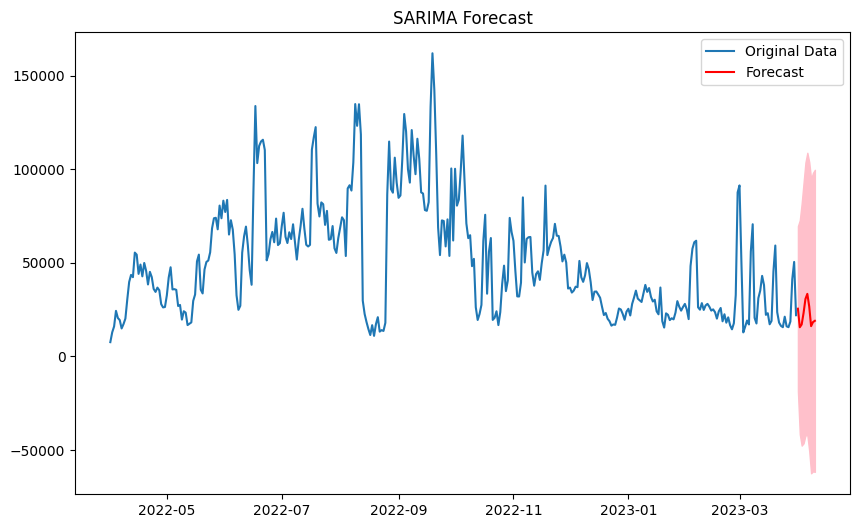

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/Time Series Techniques/Instagram-Reach.csv')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index
data.set_index('Date', inplace=True)

# Fit SARIMA model
model = SARIMAX(data['Instagram reach'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

# Forecast
forecast = model_fit.get_forecast(steps=10)
forecast_df = forecast.conf_int()
forecast_df['Forecast'] = model_fit.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Instagram reach'], label='Original Data')
plt.plot(forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink')
plt.legend(loc='best')
plt.title('SARIMA Forecast')
plt.show()


### Giải thích các bước:

1. Import Libraries: Sử dụng Pandas để thao tác dữ liệu, Matplotlib để hiển thị kết quả, và các lớp ARIMA và SARIMAX từ statsmodels để xây dựng mô hình.
2. Load Data: Đọc dữ liệu từ tệp CSV vào DataFrame.
4. Convert Date Column: Chuyển đổi cột ngày thành định dạng datetime để dễ dàng xử lý và phân tích thời gian.
4. Set Date as Index: Đặt cột ngày làm chỉ mục để có thể dễ dàng truy vấn theo ngày và thực hiện các phép toán liên quan đến thời gian.
5. Fit ARIMA/SARIMA Model: Xây dựng và huấn luyện mô hình ARIMA hoặc SARIMA với dữ liệu chuỗi thời gian.
6. Forecast: Dự báo các giá trị tương lai và hiển thị kết quả trên đồ thị.

Việc triển khai ARIMA và SARIMA giúp bạn dự báo chính xác các xu hướng và mô hình trong dữ liệu chuỗi thời gian, đặc biệt là trong các ứng dụng kinh doanh và kinh tế.

# KẾT LUẬN
Vì vậy, đây là một số kỹ thuật chuỗi thời gian cần thiết mà bạn nên biết với tư cách là Nhà khoa học dữ liệu:

1. Hiểu và chuẩn bị dữ liệu chuỗi thời gian
2. Phân rã chuỗi thời gian
3. Đường trung bình động và Làm mịn
4. Tính dừng và sai phân
5. Tự tương quan và Tự tương quan một phần
6. Trích xuất dữ liệu ngày từ dữ liệu
7. ARIMA và SARIMA
Tôi hy vọng bạn thích bài viết này về các kỹ thuật chuỗi thời gian mà bạn nên biết với tư cách là Nhà khoa học dữ liệu.